# 1. PCA

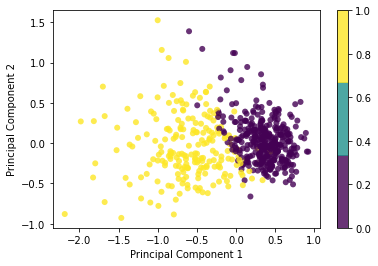

In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#importing the dataset

dataset=pd.read_csv("C:\\Users\\DELL\\Desktop\cancer.csv")
y=dataset.iloc[:,1].values
X=dataset.iloc[:,2:32].values
#normalize the dataset

scaling = MinMaxScaler()
X = scaling.fit_transform(X)


#encoding the dependent variables
from sklearn.preprocessing import LabelEncoder  
le=LabelEncoder()
y=le.fit_transform(y)

#calculate mean centered data
mean=np.mean(X,axis=0)
X=X-mean

#calcualte covariance matrix of mean data
cov=np.cov(X.T)

#calculate eigen values and eigen vectors
eigenvalues,eigenvectors=np.linalg.eig(cov)
#print(eigenvalues)
#print( eigenvectors)

#sort the eigenvalues in descending order
eigenvectors=eigenvectors.T
idx_sorting=np.argsort(eigenvalues)[::-1]
eigenvalues=eigenvalues[idx_sorting]
eigenvectors=eigenvectors[idx_sorting]
#select first 2 eigen vectors
components=eigenvectors[0:2]
Y=np.dot(X,components.T)

#two components which are
x1 = Y[:, 0]
x2 = Y[:, 1]

#visualizing the result
plt.scatter(x1, x2, c=y,edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# 2. KNN

In [5]:
#importing the libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


#calculate eculidean distance
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


def fit( X, y):
    X_train = X
    y_train = y
    
def predict(k,X):
    y_pred = [_predict(k,x) for x in X]
    return np.array(y_pred)

def _predict(k, x):
        # Compute euclidean distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [y_train[i] for i in k_idx] 
        
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [6]:
#importing the dataset
dataset=pd.read_csv("C:\\Users\\DELL\\Desktop\cancer.csv")
X=dataset.iloc[:,2:32].values
y=dataset.iloc[:,1].values
from sklearn.preprocessing import LabelEncoder     #encoding the dependent variables
le=LabelEncoder()
y=le.fit_transform(y)


In [7]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [8]:
k = 3
fit(X_train, y_train)
predictions = predict(k,X_test)
print("custom KNN classification accuracy", accuracy(y_test, predictions))

custom KNN classification accuracy 0.9473684210526315


# 3. LOGISTIC REGRESSION 

In [2]:
import numpy as np
import pandas as pd

class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #  initalize the parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [3]:
#importing the dataset
dataset=pd.read_csv("C:\\Users\\DELL\\Desktop\cancer.csv")
X=dataset.iloc[:,2:32].values
y=dataset.iloc[:,1].values
from sklearn.preprocessing import LabelEncoder     #encoding the dependent variables
le=LabelEncoder()
y=le.fit_transform(y)


In [4]:
#spliting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


print("Logistic regression  classification accuracy:", accuracy(y_test, predictions))

Logistic regression  classification accuracy: 0.9298245614035088
